# Data Cleaning

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = df[df['passenger_count'] <= 4]

In [ ]:
df = df.sort_values(['tpep_pickup_datetime'])

In [ ]:
df.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
airport_fee              9138842
Airport_fee              2924198
dtype: int64

In [ ]:
df.mode(dropna=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-04-02 15:20:57,2023-04-14,1.0,1.0,1.0,N,132,236,1,8.6,0.0,0.5,0.0,0.0,1.0,16.8,2.5,NaN,0.0


In [ ]:
df['passenger_count'].mode()

0    1.0
Name: passenger_count, dtype: float64

In [ ]:
df['passenger_count'].mean()

1.2681409495450566

In [ ]:
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()) # This is a driver-entered value

In [ ]:
df['passenger_count'].mean()

1.2681409495450566

In [ ]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

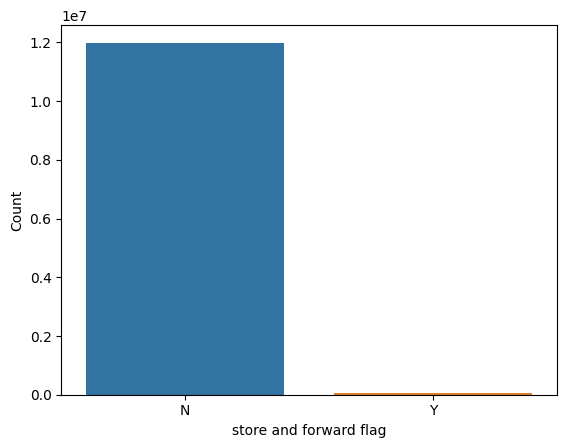

In [ ]:
sns.countplot(x='store_and_fwd_flag', data=df)
plt.xlabel('store and forward flag')
plt.ylabel('Count')
plt.show()

In [ ]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

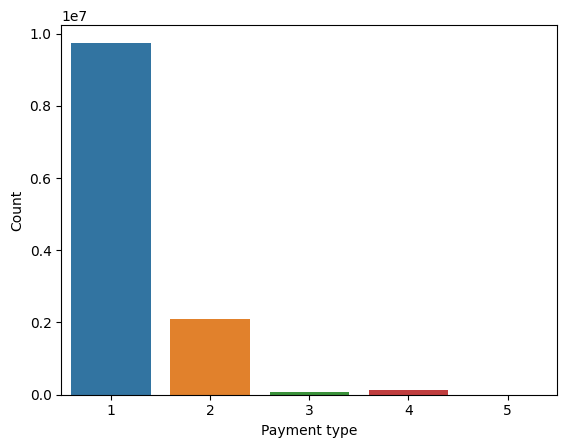

In [ ]:
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment type')
plt.ylabel('Count')
plt.show()

In [ ]:
df['fare_amount'].min()

-959.9

In [ ]:
df = df[df['fare_amount'] >= 0]

In [ ]:
df['tolls_amount'].min()

0.0

In [ ]:
df = df[df['tolls_amount'] >= 0]

In [ ]:
df['total_amount'].min()

-6.5

In [ ]:
df = df[df['total_amount'] >= 0]

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,1.195431e+07,2.899186e+06,9.055124e+06
mean,1.719969e+00,1.267676e+00,3.466237e+00,1.577218e+00,1.659381e+02,1.644061e+02,1.202629e+00,1.902544e+01,1.651196e+00,4.959705e-01,3.470532e+00,5.577223e-01,9.988092e-01,2.795928e+01,2.313468e+00,1.102753e-01,1.173455e-01
std,4.490143e-01,6.510142e-01,3.064029e+01,7.044571e+00,6.378136e+01,6.982457e+01,4.591715e-01,1.781481e+01,1.816140e+00,4.772722e-02,3.956546e+00,2.089965e+00,3.166226e-02,2.221363e+01,6.569136e-01,3.545188e-01,3.939148e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.570000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.050000e+01,2.500000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.320000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.280000e+00,0.000000e+00,1.000000e+00,2.940000e+01,2.500000e+00,0.000000e+00,0.000000e+00
max,2.000000e+00,4.000000e+00,6.235952e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,2.449500e+03,9.638000e+01,5.316000e+01,9.843000e+02,1.969900e+02,1.000000e+00,2.451000e+03,2.750000e+00,1.250000e+00,1.750000e+00


<ipython-input-39-77ce299b21a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-39-77ce299b21a3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

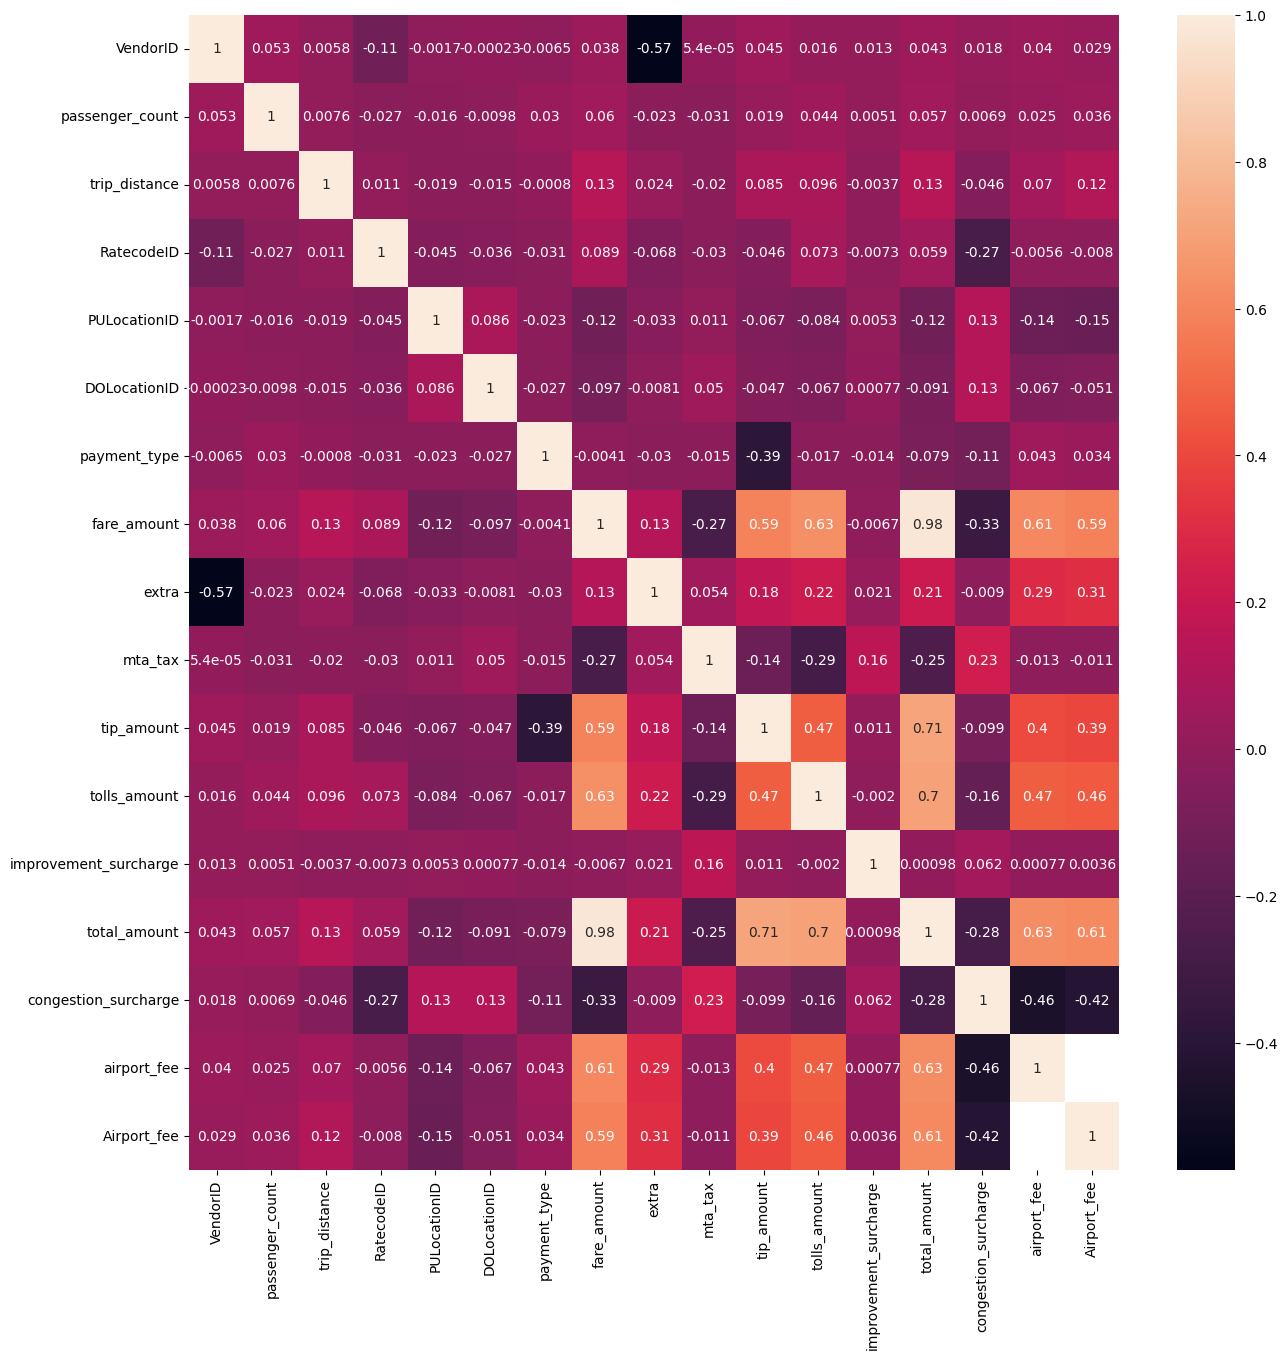

In [ ]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)